In [17]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Télécharge la structure des bandes d'énergie du matériau étudié, SrHfN2  mp-9383
with MPRester("dFloIuOFLKpmmcc3") as m:
    bands = m.get_bandstructure_by_material_id("mp-9383")

On cherche dans un premier temps à déterminer la bande interdite du SrHfN2
__________________________________________________________________________

Le matériau étudié a une bande interdite indirecte d'énergie 0.3109 [eV], il s'agit donc d'un semi-conducteur.
Le maximum de la bande de valence se situe en Γ, indiqué sur le graphe par le point vert.
Le minimum de la bande de conduction, indiqué par le point rouge, se trouve quant à lui en F.


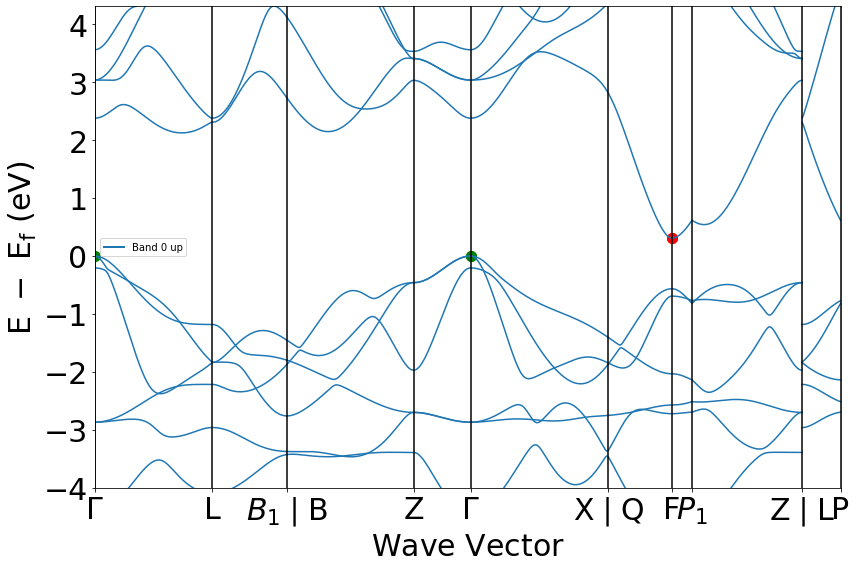

In [11]:
# Analyse de la bande interdite
bandgap = bands.get_band_gap()
print('\033[1m'+"On cherche dans un premier temps à déterminer la bande interdite du SrHfN2")
print("__________________________________________________________________________")
print('\033[0m')
print("Le matériau étudié a une bande interdite indirecte d'énergie " + '\033[1m' +"%.4f [eV]" %bandgap['energy'] +'\033[0m'+", il s'agit donc d'un semi-conducteur.")
print("Le maximum de la bande de valence se situe en" + '\033[1m' +" \u0393" +'\033[0m'+", indiqué sur le graphe par le point vert.")
print("Le minimum de la bande de conduction, indiqué par le point rouge, se trouve quant à lui en" + '\033[1m' +" F."+'\033[0m')
plotter = BSPlotter(bands)
plotter.get_plot(vbm_cbm_marker=True).show()

Etude des dispersions des bandes électroniques du matériau 
___________________________________________________________

On s'interesse au maximum et minimum de dispersion dans la dernière bande de valence et la première bande de conduction.
Pour celà, on calcule la pente de chaque direction, ce qui nous donne la variation d'énergie en fonction de la distance.

On commence d'abords avec la dernière bande de valance, la bande 14 :
Le maximum de dispersion de la bande de valence vaut 1.6470 [eV/Å], dans la direction numéro 6, soit X|Q-F.
Le minimum de dispersion de la bande de valence vaut 0.3039 [eV/Å], dans la direction numéro 8, soit P1-Z|L.

Ensuite pour la première bande de conduction, la bande 15 : 
Le maximum de dispersion de la bande de valence vaut 4.7203 [eV/Å], dans la direction numéro 9, soit Z|L-P.
Le minimum de dispersion de la bande de valence vaut 0.4468 [eV/Å], dans la direction numéro 1, soit Γ-L.
Sur le graphes ci-dessous, on peut observer les dispersions de la premièr

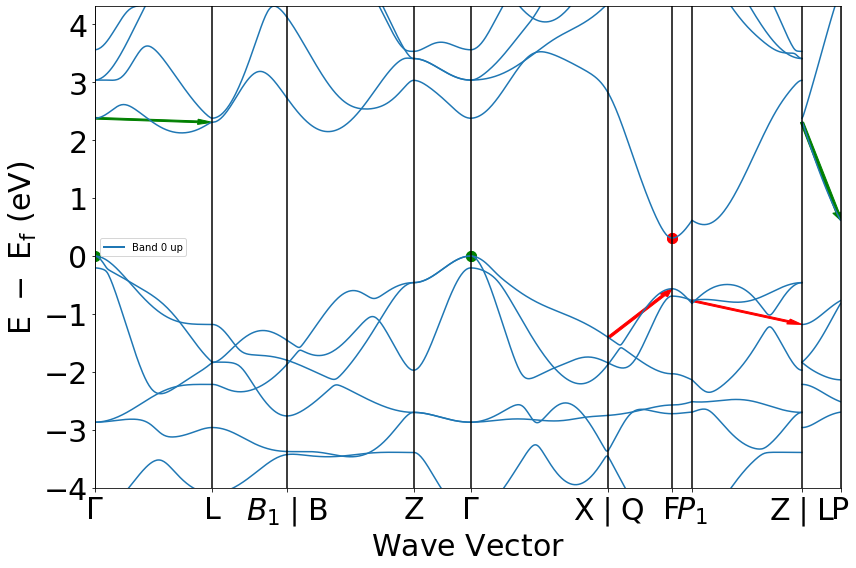

In [79]:
# Analyse des dispersion des bandes électroniques
cbm = bands.get_cbm()
vbm = bands.get_vbm()
data = plotter.bs_plot_data()
distances = data.get('distances')
energies = data.get('energy').get('1')
print('\033[1m'+"Etude des dispersions des bandes électroniques du matériau ")
print("___________________________________________________________")
print('\033[0m')
print("On s'interesse au maximum et minimum de dispersion dans la dernière bande de valence et la première bande de conduction.")
print("Pour celà, on calcule la pente de chaque direction, ce qui nous donne la variation d'énergie en fonction de la distance.")
print("")
print("On commence d'abords avec la dernière bande de valance, la bande 14 :")
slope_val = np.zeros(9)
for i in range (0,9):
    max_val = max(energies[i][14])
    min_val = min(energies[i][14])
    dist_val = max(distances[i]) - min(distances[i])
    slope_val[i] = (max_val-min_val)/dist_val
    
maxi_slope_val = max(slope_val)
for i in range (0,9):
    if slope_val[i]==maxi_slope_val:
        print("Le maximum de dispersion de la bande de valence vaut %0.4f [eV/Å], dans la direction numéro %d, soit X|Q-F." %(maxi_slope_val,(i+1)))

mini_slope_val = min(slope_val)  
for i in range (0,9):
    if slope_val[i]==mini_slope_val:
        print("Le minimum de dispersion de la bande de valence vaut %0.4f [eV/Å], dans la direction numéro %d, soit P1-Z|L." %(mini_slope_val,(i+1)))

print("")
print("Ensuite pour la première bande de conduction, la bande 15 : ")
slope_cond = np.zeros(9)
for i in range (0,9):
    max_cond = max(energies[i][15])
    min_cond = min(energies[i][15])
    dist_cond = max(distances[i]) - min(distances[i])
    slope_cond[i] = (max_cond-min_cond)/dist_cond
    
maxi_slope_cond = max(slope_cond)
for i in range (0,9):
    if slope_cond[i]==maxi_slope_cond:
        print("Le maximum de dispersion de la bande de valence vaut %0.4f [eV/Å], dans la direction numéro %d, soit Z|L-P." %(maxi_slope_cond,(i+1)))

mini_slope_cond = min(slope_cond)  
for i in range (0,9):
    if slope_cond[i]==mini_slope_cond:
        print("Le minimum de dispersion de la bande de valence vaut %0.4f [eV/Å], dans la direction numéro %d, soit \u0393-L." %(mini_slope_cond,(i+1)))

print("Sur le graphes ci-dessous, on peut observer les dispersions de la première bande de conduction en vert et de la dernière bance de valence en rouge :")
plotter.get_plot(vbm_cbm_marker=True)
xmin_val_1 = distances[7][0]
ymin_val_1 = energies[7][14][0]
xmin_val_2 = distances[8][0]
ymin_val_2 = energies[8][14][0]
plt.arrow(xmin_val_1,ymin_val_1,xmin_val_2-xmin_val_1,ymin_val_2-ymin_val_1,width=0.03,length_includes_head=True,color='r')
xmax_val_1 = distances[5][0]
ymax_val_1 = energies[5][14][0]
xmax_val_2 = distances[6][0]
ymax_val_2 = energies[6][14][0]
plt.arrow(xmax_val_1,ymax_val_1,xmax_val_2-xmax_val_1,ymax_val_2-ymax_val_1,width=0.03,length_includes_head=True,color='r')
xmin_cond_1 = distances[0][0]
ymin_cond_1 = energies[0][15][0]
xmin_cond_2 = distances[1][0]
ymin_cond_2 = energies[1][15][0]
plt.arrow(xmin_cond_1,ymin_cond_1,xmin_cond_2-xmin_cond_1,ymin_cond_2-ymin_cond_1,width=0.03,length_includes_head=True,color='g')
xmax_cond_1 = distances[8][0]
ymax_cond_1 = energies[8][15][0]
xmax_cond_2 = distances[8][len(distances[8])-1]
ymax_cond_2 = energies[8][15][len(energies[8][15])-1]
plt.arrow(xmax_cond_1,ymax_cond_1,xmax_cond_2-xmax_cond_1,ymax_cond_2-ymax_cond_1,width=0.03,length_includes_head=True,color='g')
plt.show()